<a href="https://colab.research.google.com/github/IndraMadika/ML-Mentoring/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip



--2023-06-04 17:26:47--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   167MB/s    in 0.4s    

2023-06-04 17:26:48 (167 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/sample_data')
zip_ref.close()
     


Akurasi: 0.54


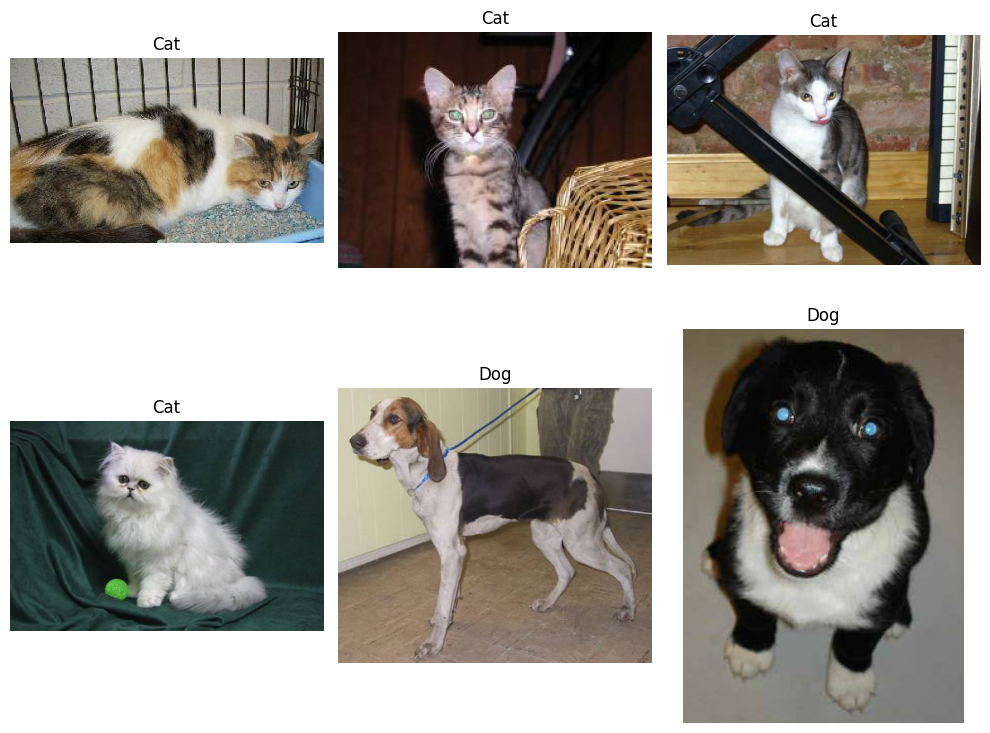

In [27]:
import os

# Load dataset
train_dir = '/content/sample_data/cats_and_dogs_filtered/train' 
test_dir = '/content/sample_data/cats_and_dogs_filtered/validation'

# Mendapatkan list file gambar untuk training
cat_files_train = [os.path.join(train_dir, 'cats', file) for file in os.listdir(os.path.join(train_dir, 'cats'))]
dog_files_train = [os.path.join(train_dir, 'dogs', file) for file in os.listdir(os.path.join(train_dir, 'dogs'))]

# Mendapatkan list file gambar untuk testing
cat_files_test = [os.path.join(test_dir, 'cats', file) for file in os.listdir(os.path.join(test_dir, 'cats'))]
dog_files_test = [os.path.join(test_dir, 'dogs', file) for file in os.listdir(os.path.join(test_dir, 'dogs'))]

# Mendefinisikan label (0 untuk kucing, 1 untuk anjing)
labels_train = [0] * len(cat_files_train) + [1] * len(dog_files_train)
labels_test = [0] * len(cat_files_test) + [1] * len(dog_files_test)

# Ekstraksi fitur dari gambar (contoh: menggunakan ukuran gambar sebagai fitur)
features_train = []
for file in cat_files_train + dog_files_train:
    image = plt.imread(file)
    width, height, _ = image.shape
    features_train.append([width, height])

features_test = []
for file in cat_files_test + dog_files_test:
    image = plt.imread(file)
    width, height, _ = image.shape
    features_test.append([width, height])

# Konversi ke numpy array
X_train = np.array(features_train)
y_train = np.array(labels_train)

X_test = np.array(features_test)
y_test = np.array(labels_test)

# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Visualisasi gambar yang diprediksi beserta label prediksinya
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    if y_pred[i] == 0:
        image = Image.open(cat_files_test[i])
        label = "Cat"
    else:
        image = Image.open(dog_files_test[i - len(cat_files_test)])
        label = "Dog"
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(label)
plt.tight_layout()
plt.show()


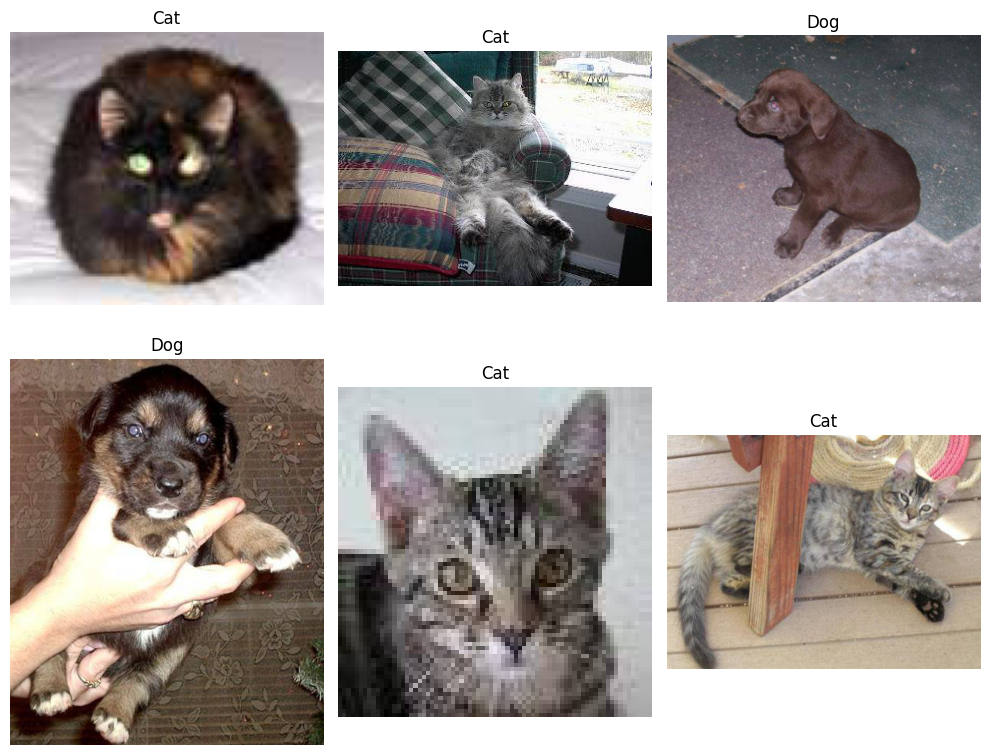

In [32]:
# Menggabungkan file gambar kucing dan anjing
files_test = cat_files_test + dog_files_test
labels = ["Cat"] * len(cat_files_test) + ["Dog"] * len(dog_files_test)

# Menggabungkan data prediksi dengan label
data = list(zip(files_test, y_pred, labels))

# Mengacak urutan data
np.random.shuffle(data)

# Visualisasi gambar yang diprediksi beserta label prediksinya
fig, axes = plt.subplots(2, 3, figsize=(10, 8))
for i, ax in enumerate(axes.flat):
    file, prediction, label = data[i]
    image = plt.imread(file)
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(label)
plt.tight_layout()
plt.show()
